## MACHINE LEARNING PROJECT :- 2

## PROJECT NAME :- DRY BEANS CLASSIFICATION

### CREATED BY :- JAYASHRI PACHARANE,  DATE :- 24TH SEPT.2024

### IMPORTING LIBRARIES AND DATA :-

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


In [2]:
# loading the data from excel file to a Pandas DataFrame

Dry_Bean =  pd.read_excel('Dry_Bean_Dataset.xlsx')

Dry_Bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### EDA PART:-

In [3]:
# first 5 rows of the dataframe

Dry_Bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# number of rows and columns

Dry_Bean.shape

(13611, 17)

In [5]:
# getting some informations about the dataset

Dry_Bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
# checking for missing values

Dry_Bean.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
# statistical Measures of the dataset

Dry_Bean.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [8]:
Dry_Bean.duplicated().sum()

68

In [9]:
Dry_Bean.drop_duplicates(inplace=True)

In [10]:
Dry_Bean["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

### Histogram of all features by target("Class"):-

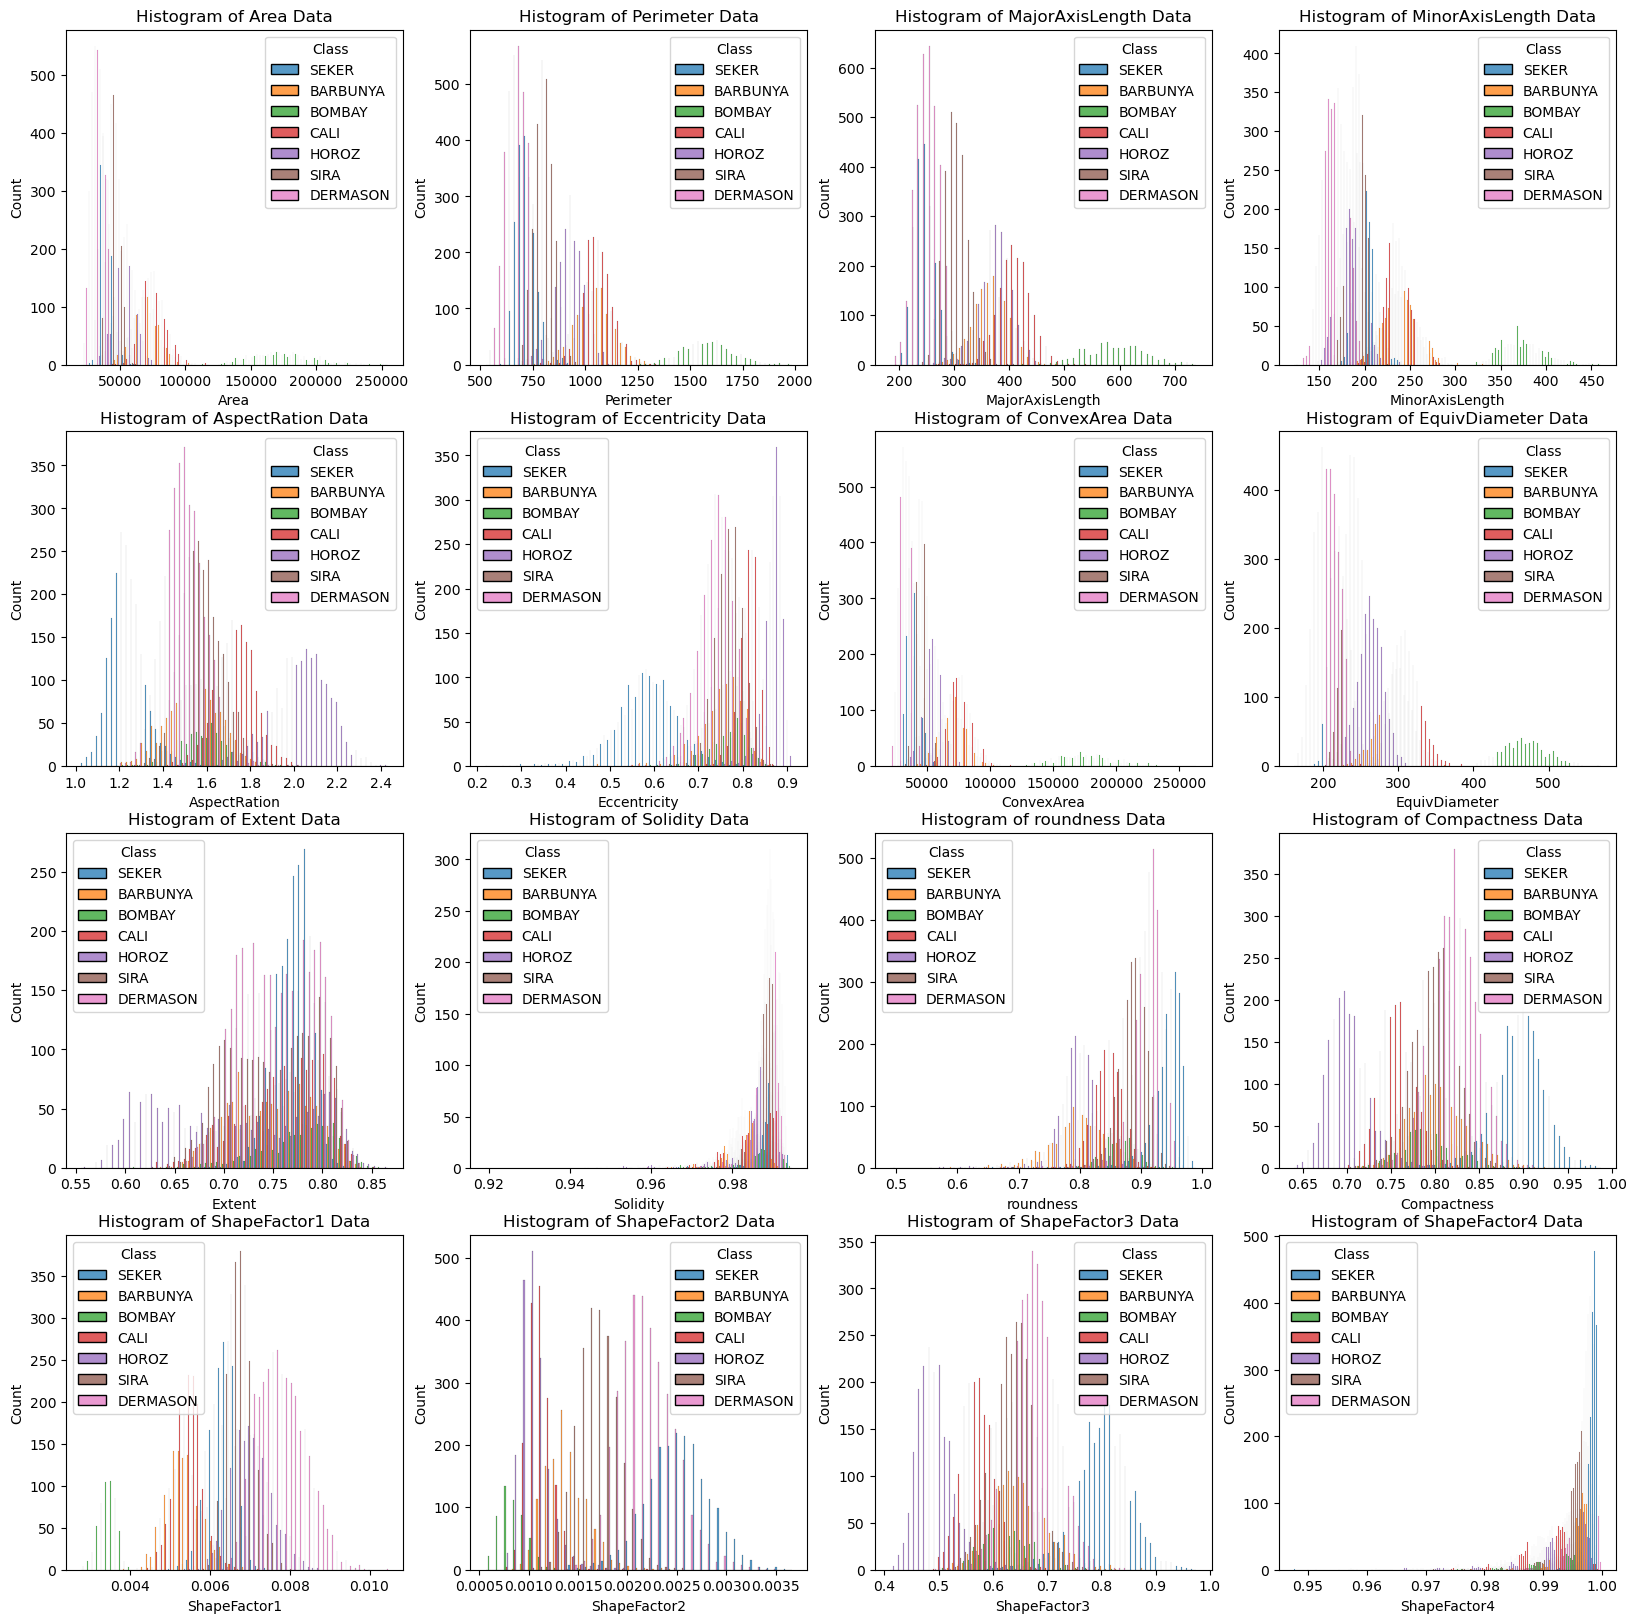

In [11]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(Dry_Bean.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.histplot(x = Dry_Bean[col], hue = Dry_Bean["Class"], multiple = "dodge")
    plt.title(f"Histogram of {col} Data")
    plt.plot()

<Axes: xlabel='Class', ylabel='count'>

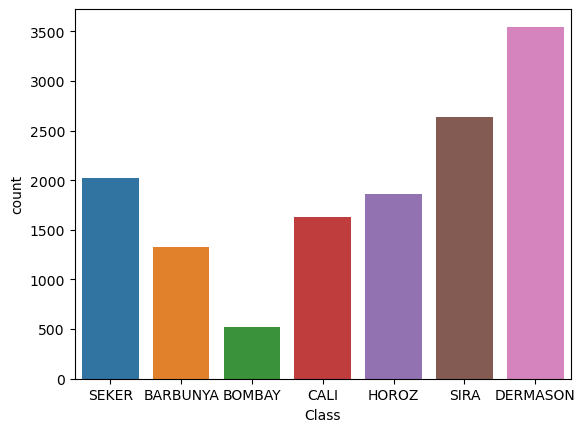

In [12]:
sns.countplot(x='Class', data=Dry_Bean)

<Axes: xlabel='Class', ylabel='Area'>

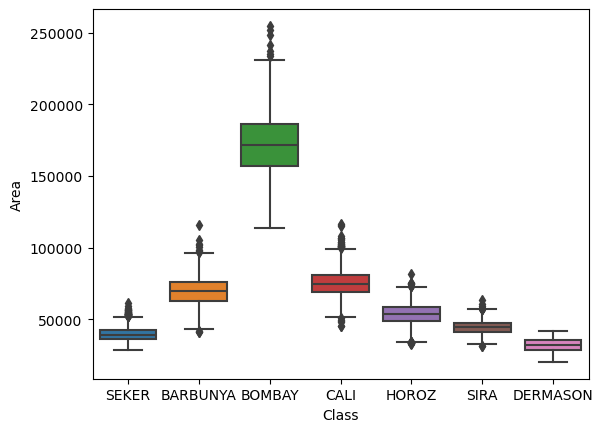

In [13]:
sns.boxplot(x='Class', y='Area', data=Dry_Bean)

In [14]:
Dry_Bean.pivot_table(columns = "Class", values = Dry_Bean.columns[:-1], aggfunc = "mean")

Class,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Area,69804.133132,173485.059387,75538.211043,32118.710942,53671.732796,39881.299951,44729.128604
AspectRation,1.544395,1.585550,1.733663,1.490471,2.026532,1.245182,1.570083
Compactness,0.805001,0.792622,0.756703,0.819110,0.700818,0.896841,0.797345
ConvexArea,71025.729198,175813.116858,76688.503067,32498.435138,54463.101075,40269.567341,45273.099772
Eccentricity,0.754665,0.770518,0.814804,0.736632,0.867482,0.584781,0.767277
EquivDiameter,297.311018,468.941426,309.535280,201.683813,260.791645,224.948441,238.335316
Extent,0.749273,0.776559,0.758953,0.752953,0.705512,0.771674,0.749445
MajorAxisLength,370.044279,593.152075,409.499538,246.557279,372.693927,251.291957,299.380258
MinorAxisLength,240.309352,374.352547,236.370616,165.657143,184.197789,201.909653,190.800250
Perimeter,1046.105764,1585.619079,1057.634282,665.209536,920.108600,727.672440,796.418737


In [3]:
class_parameter = {"DERMASON" : 0, "SIRA" : 1, "SEKER" : 2, "HOROZ" : 3, "CALI" : 4, "BARBUNYA" : 5, "BOMBAY" : 6}
Dry_Bean["Class"] = Dry_Bean["Class"].map(class_parameter)
Dry_Bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,2


### TOP 3 CORRELATION OF THIS DATA WITH "CLASS" :-

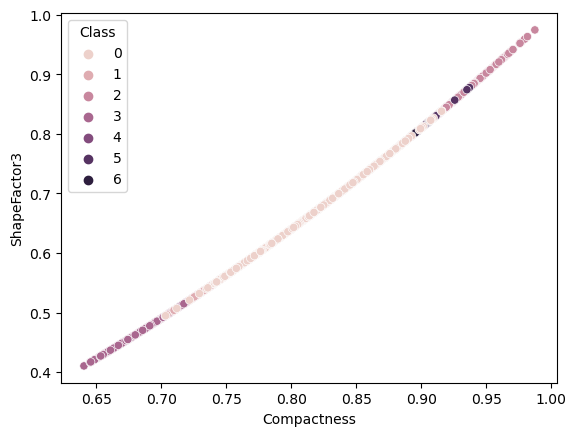

In [16]:
sns.scatterplot(x = Dry_Bean["Compactness"], y = Dry_Bean["ShapeFactor3"], hue = Dry_Bean["Class"])
plt.show()

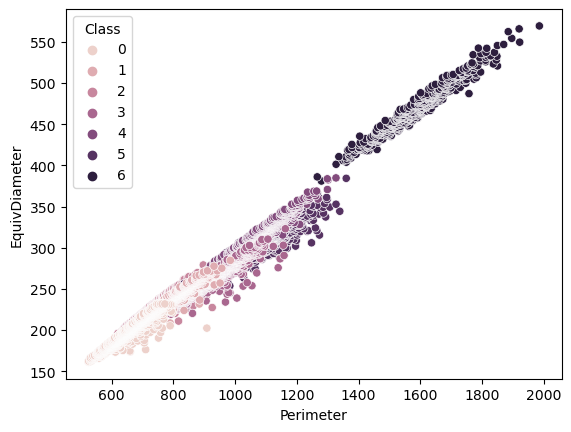

In [17]:
sns.scatterplot(x = Dry_Bean["Perimeter"], y = Dry_Bean["EquivDiameter"], hue = Dry_Bean["Class"])
plt.show()

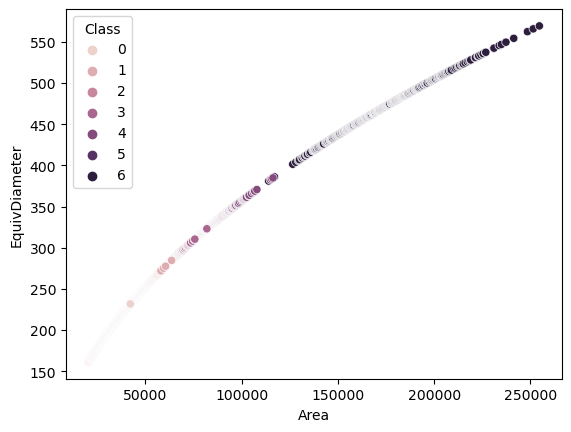

In [18]:
sns.scatterplot(x = Dry_Bean["Area"], y = Dry_Bean["EquivDiameter"], hue = Dry_Bean["Class"])
plt.show()

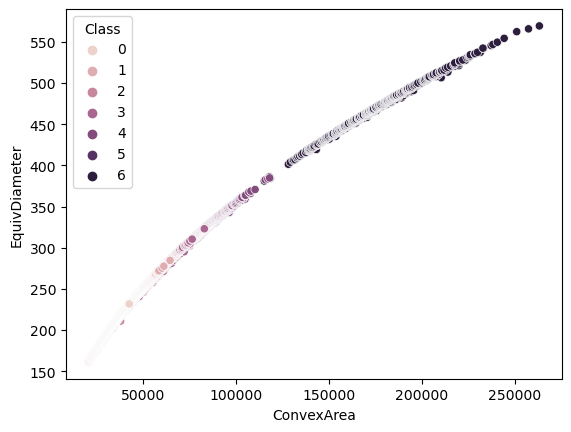

In [107]:
sns.scatterplot(x = Dry_Bean["ConvexArea"], y = Dry_Bean["EquivDiameter"], hue = Dry_Bean["Class"])
plt.show()

### DATA PRE-PROCESSING :-

In [4]:
X = Dry_Bean.drop(['Class'], axis = 1)
Y = Dry_Bean['Class']

In [5]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

### LOGISTIC REGRESSION :-

In [22]:
#LOGISTIC REGRESSION:-
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()


In [23]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [24]:
predictions_train=logmodel.predict(X_train)

In [25]:
predictions_test=logmodel.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions_test)

array([[602,  60,  40,   5,   0,   0,   0],
       [ 32, 345,  80,  77,   0,   0,   0],
       [ 99,  52, 251,   8,   0,   4,   0],
       [ 19, 118,   9, 212,  12,   6,   0],
       [  0,   1,   3,   9, 226,  66,   0],
       [  0,   5,   0,  38,  73, 143,   0],
       [  0,   0,   0,   0,   0,   0, 114]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions_test)

0.698781838316722

In [28]:
from sklearn.metrics import classification_report

In [29]:
report_train = classification_report(Y_train, predictions_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      2839
           1       0.58      0.64      0.61      2102
           2       0.69      0.62      0.65      1613
           3       0.59      0.56      0.57      1484
           4       0.72      0.75      0.74      1325
           5       0.63      0.52      0.57      1063
           6       1.00      1.00      1.00       408

    accuracy                           0.70     10834
   macro avg       0.72      0.71      0.71     10834
weighted avg       0.70      0.70      0.70     10834



In [30]:
report_test = classification_report(Y_test, predictions_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       707
           1       0.59      0.65      0.62       534
           2       0.66      0.61      0.63       414
           3       0.61      0.56      0.58       376
           4       0.73      0.74      0.73       305
           5       0.65      0.55      0.60       259
           6       1.00      1.00      1.00       114

    accuracy                           0.70      2709
   macro avg       0.72      0.71      0.71      2709
weighted avg       0.70      0.70      0.70      2709



### DECISION TREE REGRESSION :-

In [31]:
# Decision tree Regression:-
from sklearn.tree import DecisionTreeRegressor
#Choosing max depth as 6 after trying different values

Dtree = DecisionTreeRegressor(max_depth =6)
Dtree.fit(X_train,Y_train)
Y_pred_train_Dtree = Dtree.predict(X_train)
Y_pred_train_Dtree = Dtree.predict(X_test)

In [32]:
Dtree.score(X_train,Y_train)

0.9543839079837365

In [33]:
Dtree.score(X_test,Y_test)

0.9351641940597953

In [29]:
def data_preprocessing(Dry_Bean):

    X = Dry_Bean.drop(['Class'], axis = 1)
    Y = Dry_Bean['Class']

    encoder = LabelEncoder()
    Y = encoder.fit_transform(Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the testing data
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, Y_train, Y_test

In [30]:
dataset = {"Bean_Data":Dry_Bean}

### RANDOM FOREST(RF):-

In [27]:
model = RandomForestClassifier(random_state=42)

for name,data in dataset.items():
    X_train, X_test, Y_train, Y_test = data_preprocessing(data)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(name)
    print("----------")
    print(classification_report(Y_test, Y_pred))
    print("---------------------------------------------------------")

Bean_Data
----------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       671
           1       0.88      0.88      0.88       536
           2       0.97      0.94      0.95       413
           3       0.97      0.96      0.96       408
           4       0.92      0.94      0.93       317
           5       0.93      0.90      0.92       261
           6       1.00      1.00      1.00       117

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723

---------------------------------------------------------



#### The accuracy of the Random Forest model in predicting the bean class is approximately 92%. 


### CONFUSION MATRIX OF RANDOM FOREST:-

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

In [38]:
# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Confusion Matrix:
 [[652  40  14   1   0   0   0]
 [ 48 466   8  10   1   1   0]
 [ 13   9 389   0   0   3   0]
 [  5   6   0 357   4   4   0]
 [  0   2   1   1 287  14   0]
 [  0   6   1   1  20 231   0]
 [  0   0   0   0   0   0 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       707
           1       0.88      0.87      0.88       534
           2       0.94      0.94      0.94       414
           3       0.96      0.95      0.96       376
           4       0.92      0.94      0.93       305
           5       0.91      0.89      0.90       259
           6       1.00      1.00      1.00       114

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



### KNN REGRESSION:-

In [8]:
# KNN model
from sklearn.neighbors import KNeighborsRegressor

KNN_model_raw = KNeighborsRegressor()
KNN_model_raw.fit(X_train, Y_train)
raw_y_pred_train_lr = KNN_model_raw.predict(X_train)
raw_y_pred_val_lr = KNN_model_raw.predict(X_test)

In [9]:
# Splitting dependent and independent variable

raw_x_train = Dry_Bean.drop(['Class'], axis = 1)
raw_y_train = Dry_Bean['Class']

raw_x_val = Dry_Bean.drop(['Class'], axis = 1)
raw_y_val = Dry_Bean['Class']

raw_x_train.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430


In [10]:
from sklearn.metrics import mean_squared_error, r2_score


# Function to find the best value of K based on mean squared error

def find_k(X_train, Y_train, X_test, Y_test):
    error_rate = []    # Finding the error rate for 50 iterations

    for i in range(1, 50):
        knn = KNeighborsRegressor(n_neighbors = i)    # Building the model with i neighbors
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        error_rate.append(mean_squared_error(Y_test, Y_pred))
    
# Ploting the error values to find the best value of k
    
    plt.figure(figsize = (8, 8))
    plt.plot(range(1,50), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'blue')
    plt.title("Mean Squared Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Mean Squared Error")
    plt.show()

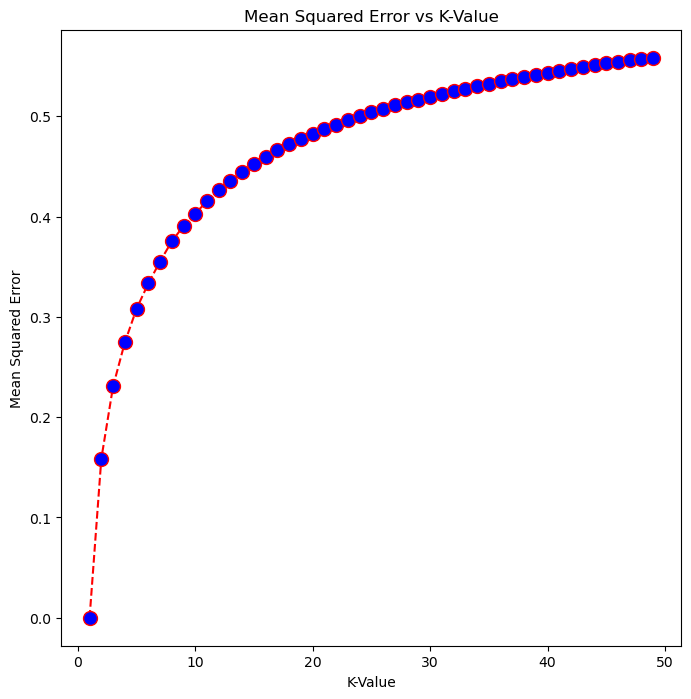

In [11]:
from sklearn.neighbors import KNeighborsRegressor

find_k(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

In [12]:
# Building KNN regressor with k = 2
knn_raw = KNeighborsRegressor(n_neighbors = 2)
knn_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_knn = knn_raw.predict(raw_x_train)
raw_y_pred_val_knn = knn_raw.predict(raw_x_val)

print("Accuracy Scores for KNN Regressor model on raw data")
raw_knn_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_knn)
raw_train_knn_r2s = r2_score(raw_y_train, raw_y_pred_train_knn)
raw_val_knn_r2s = r2_score(raw_y_val, raw_y_pred_val_knn)
print("Mean Squared Error :", raw_knn_rmse)
print("R-squared Score (Train) :", raw_train_knn_r2s)
print("R-squared Score (Test) :", raw_val_knn_r2s)
print("**************" * 7)

Accuracy Scores for KNN Regressor model on raw data
Mean Squared Error : 0.15851149805304532
R-squared Score (Train) : 0.9524251512226013
R-squared Score (Test) : 0.9524251512226013
**************************************************************************************************


In [13]:
#Initialize variables to store results
k_values = range(1,50 ) 
mse_results = []

# Use a for loop to train and evaluate KNN regression
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = knn_regressor.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(Y_test, Y_pred)
    mse_results.append(mse)
    print(f"K={k}, MSE={mse:.2f}")

# Determine the best k value
best_k = k_values[np.argmin(mse_results)]
print(f"\nBest K: {best_k} with MSE: {min(mse_results):.2f}")

K=1, MSE=0.65
K=2, MSE=0.53
K=3, MSE=0.51
K=4, MSE=0.50
K=5, MSE=0.50
K=6, MSE=0.51
K=7, MSE=0.51
K=8, MSE=0.52
K=9, MSE=0.53
K=10, MSE=0.54
K=11, MSE=0.54
K=12, MSE=0.54
K=13, MSE=0.55
K=14, MSE=0.55
K=15, MSE=0.55
K=16, MSE=0.56
K=17, MSE=0.56
K=18, MSE=0.56
K=19, MSE=0.57
K=20, MSE=0.57
K=21, MSE=0.57
K=22, MSE=0.57
K=23, MSE=0.57
K=24, MSE=0.58
K=25, MSE=0.58
K=26, MSE=0.58
K=27, MSE=0.58
K=28, MSE=0.59
K=29, MSE=0.59
K=30, MSE=0.59
K=31, MSE=0.59
K=32, MSE=0.60
K=33, MSE=0.60
K=34, MSE=0.60
K=35, MSE=0.60
K=36, MSE=0.60
K=37, MSE=0.60
K=38, MSE=0.60
K=39, MSE=0.60
K=40, MSE=0.60
K=41, MSE=0.60
K=42, MSE=0.61
K=43, MSE=0.61
K=44, MSE=0.61
K=45, MSE=0.61
K=46, MSE=0.61
K=47, MSE=0.61
K=48, MSE=0.61
K=49, MSE=0.61

Best K: 5 with MSE: 0.50
